In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
sequence_length = 10
img_height, img_width = 128, 128
data_path =r"C:\Users\laptop\Desktop\youmyy\Human Action Recognition\train" 


In [3]:
def load_sequences(data_path):
    X, y = [], []
    class_names = sorted(os.listdir(data_path))
    label_map = {name: idx for idx, name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(data_path, class_name)
        frames = sorted(os.listdir(class_dir))
        label = label_map[class_name]
        
        for i in range(0, len(frames) - sequence_length + 1, sequence_length):
            sequence = []
            for j in range(sequence_length):
                img_path = os.path.join(class_dir, frames[i + j])
                img = load_img(img_path, target_size=(img_height, img_width))
                img = img_to_array(img) / 255.0
                sequence.append(img)
            X.append(sequence)
            y.append(label)
    return np.array(X), np.array(y), class_names


In [5]:
import pandas as pd

csv_path =  r"C:\Users\laptop\Desktop\youmyy\Human Action Recognition\Training_set.csv"
image_dir = r"C:\Users\laptop\Desktop\youmyy\Human Action Recognition\train" 

df = pd.read_csv(csv_path)
df = df.sort_values(by="filename")  
label_map = {label: idx for idx, label in enumerate(df['label'].unique())}
df['label_id'] = df['label'].map(label_map)

print("Labels:", label_map)


Labels: {'sitting': 0, 'dancing': 1, 'fighting': 2, 'using_laptop': 3, 'laughing': 4, 'listening_to_music': 5, 'texting': 6, 'eating': 7, 'clapping': 8, 'cycling': 9, 'drinking': 10, 'sleeping': 11, 'running': 12, 'calling': 13, 'hugging': 14}


In [7]:
def create_sequences_flexible(df, image_dir, sequence_length=10):
    X, y = [], []
    num_sequences = len(df) // sequence_length

    for i in range(0, num_sequences * sequence_length, sequence_length):
        sequence_imgs = []
        for j in range(sequence_length):
            img_name = df.iloc[i + j]['filename']
            img_path = os.path.join(image_dir, img_name)
            
            if not os.path.exists(img_path):
                continue
            
            img = load_img(img_path, target_size=(img_height, img_width))
            img = img_to_array(img) / 255.0
            sequence_imgs.append(img)
        
        if len(sequence_imgs) == sequence_length:
            X.append(sequence_imgs)
            label = df.iloc[i]['label_id']  
            y.append(label)
    
    return np.array(X), np.array(y)



In [30]:
X, y = create_sequences_flexible(df, image_dir, sequence_length=10)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1260, 10, 128, 128, 3)
y shape: (1260,)


In [28]:
image_path = os.path.join(train_path, class_images[0])


In [31]:
from tensorflow.keras.layers import Input

num_classes = len(label_map)  # عدد التصنيفات

model = Sequential([
    Input(shape=(sequence_length, img_height, img_width, 3)),
    TimeDistributed(Conv2D(32, (3,3), activation='relu')),
    TimeDistributed(MaxPooling2D((2,2))),
    TimeDistributed(Conv2D(64, (3,3), activation='relu')),
    TimeDistributed(MaxPooling2D((2,2))),
    TimeDistributed(Flatten()),
    LSTM(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_10                  │ (None, 10, 126, 126, 32)    │             896 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_11                  │ (None, 10, 63, 63, 32)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_12                  │ (None, 10, 61, 61, 64)      │          18,496 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_13                  │ (None, 10, 30, 30, 64)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_14                  │ (None, 10, 57600)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │      14,762,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,791,887 (56.43 MB)

 Trainable params: 14,791,887 (56.43 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (1008, 10, 128, 128, 3)
Validation shape: (252, 10, 128, 128, 3)


In [35]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8)


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.0569 - loss: 2.8575 - val_accuracy: 0.0794 - val_loss: 2.7076
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.0558 - loss: 2.7585 - val_accuracy: 0.0794 - val_loss: 2.7075
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.0899 - loss: 2.7178 - val_accuracy: 0.0675 - val_loss: 2.7050
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.0567 - loss: 2.7310 - val_accuracy: 0.0794 - val_loss: 2.7081
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.0737 - loss: 2.7332 - val_accuracy: 0.0794 - val_loss: 2.7089
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.0840 - loss: 2.7044 - val_accuracy: 0.0714 - val_loss: 2.7036
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0841 - loss: 2.6896 - val_accuracy: 0.0635 - val_loss: 2.7140
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.2779 - loss: 2.3949 - val_accu

In [39]:
model.save("cnn_lstm_har_model.keras")


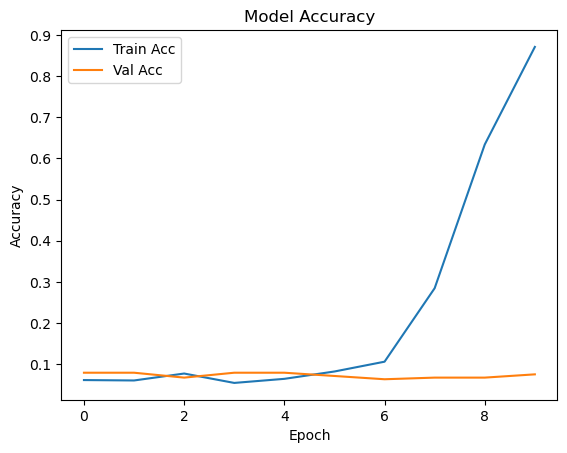

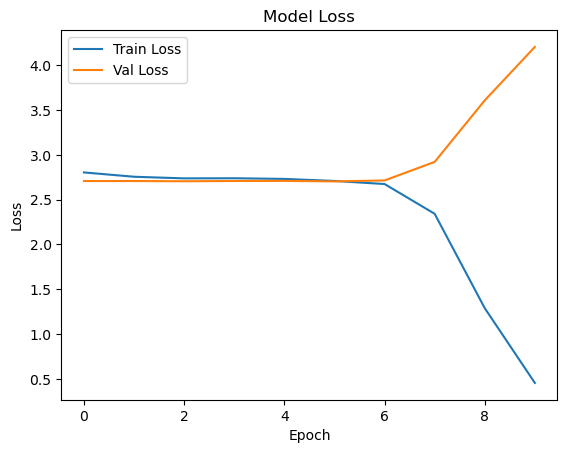

In [41]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step
                    precision    recall  f1-score   support

           sitting       0.00      0.00      0.00        17
           dancing       0.21      0.25      0.23        20
          fighting       0.06      0.07      0.06        14
      using_laptop       0.15      0.12      0.13        17
          laughing       0.00      0.00      0.00        20
listening_to_music       0.11      0.10      0.11        20
           texting       0.00      0.00      0.00        16
            eating       0.00      0.00      0.00        14
          clapping       0.00      0.00      0.00        14
           cycling       0.11      0.14      0.12        14
          drinking       0.09      0.17      0.12        18
          sleeping       0.08      0.12      0.09        17
           running       0.00      0.00      0.00        19
           calling       0.00      0.00      0.00        16
           hugging       0.29      0.12      0.17        16


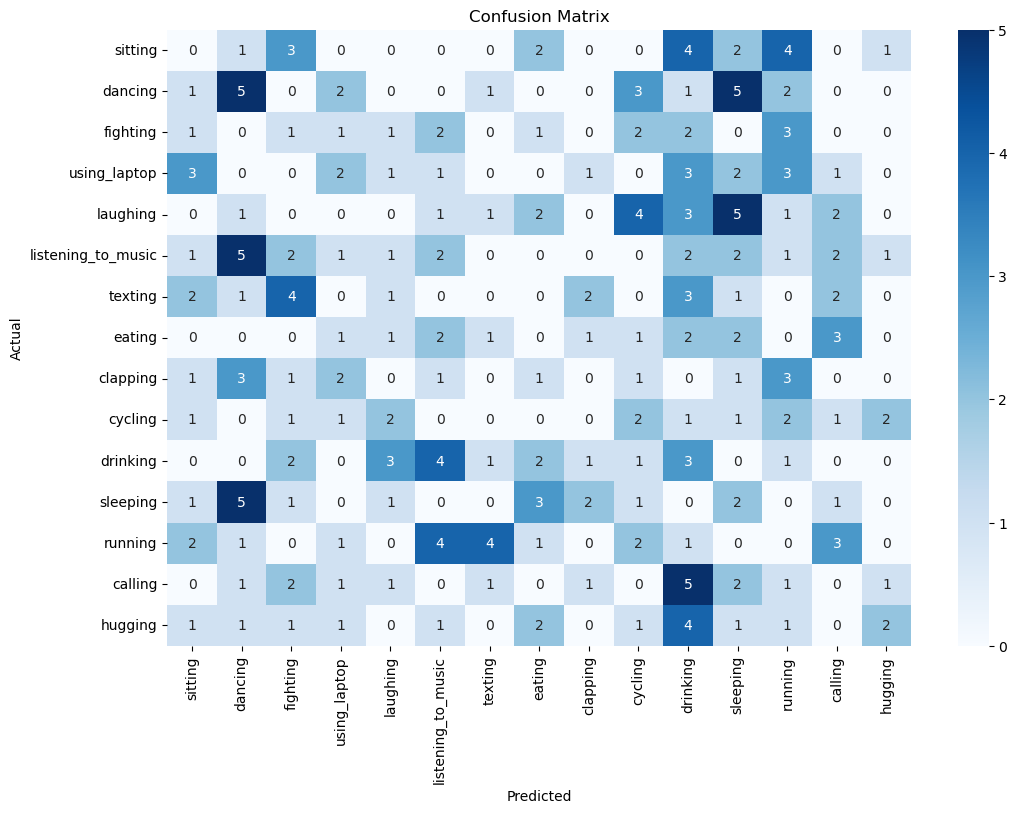

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# التنبؤ على validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

# التقرير
print(classification_report(y_val, y_pred, target_names=label_map.keys()))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys(), cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8, callbacks=[early_stopping])
